# Лабораторная работа №3 Кластеризация

---

Цель - определить какие страны нужндаются в гуманитарной и экономической помощи

Задачи
- Провести EDA, Скалировать данные
- Применить 3 модели кластеризации `KMeans, AgglomerativeClasterisation, DBSCAN`, определить оптимальное количство классов
- Описать классы моделей и определить каким странам нужна помощь

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gdown 1hgsYFBfMYgu_E8lf7t-ZRaQlNqOhQ8h_

Downloading...
From: https://drive.google.com/uc?id=1hgsYFBfMYgu_E8lf7t-ZRaQlNqOhQ8h_
To: /content/Lab3.csv
100% 9.23k/9.23k [00:00<00:00, 22.2MB/s]


In [ ]:
path  = "/content/Lab3.csv"

In [ ]:
data = pd.read_csv(path)
data.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


# 1 Предобработка данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


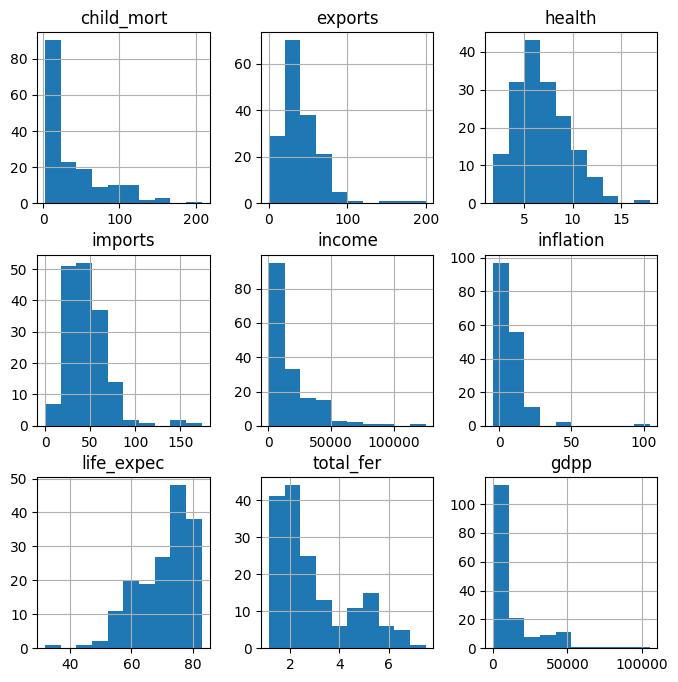

In [ ]:
data.hist(figsize=(8, 8))
plt.show()

UPD Для карты не находит некоторые страны

In [ ]:
data.loc[data.country == "China", "country"] = 'CN'
data.loc[data.country == "United States", "country"] = 'USA'

## Скалирование

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop("country", axis=1))

# Кластеризация

## KMeans

In [ ]:
from sklearn.cluster import KMeans

### Определение оптимального количества кластеров

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
def metrics(X_scaled, max_cl=10):
  sil_scores = []
  inertias = []

  for k in range(2, max_cl + 1):
      kmeans = KMeans(n_clusters=k, random_state=42)

      labels = kmeans.fit_predict(X_scaled)

      sil_scores.append(silhouette_score(X_scaled, labels))
      inertias.append(kmeans.inertia_)

  return sil_scores, inertias

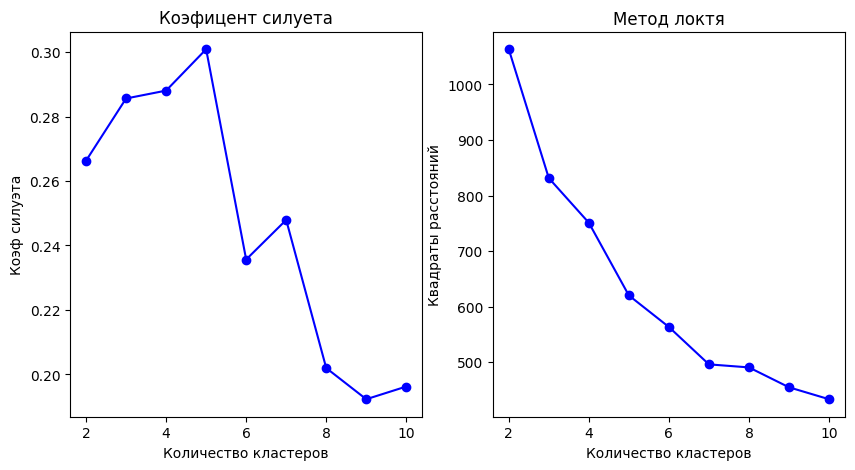

In [ ]:
sil_scores, inertias = metrics(X_scaled)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax = ax.flatten()
ax[0].plot(range(2, 10 + 1), sil_scores, 'bo-')
ax[0].set_xlabel('Количество кластеров')
ax[0].set_ylabel('Коэф силуэта')
ax[0].set_title('Коэфицент силуета')

ax[1].plot(range(2, 10 + 1), inertias, 'bo-')
ax[1].set_xlabel('Количество кластеров')
ax[1].set_ylabel('Квадраты расстояний')
ax[1].set_title('Метод локтя')

plt.show()

### Оптимальное количество кластеров - 5

Такое оптимально число выбрал по коэфиценту силуэта, а также с такого количество кластеров растояние по методу локтя уменьшаются слабо

In [ ]:
model = KMeans(n_clusters=5, random_state=42)
labels = model.fit_predict(X_scaled)

### Проведем визуализацию при помощи метода главных компонент

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['cluster'] = labels
df.head(3)

,PC1,PC2,cluster
0,-2.913025,0.095621,2
1,0.429911,-0.588156,0
2,-0.285225,-0.455174,0


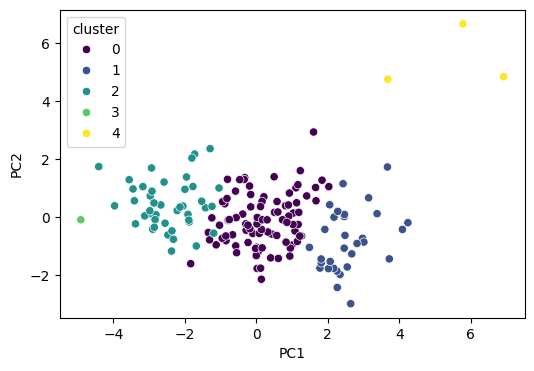

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.show()

### Описание классов

Веса признаков в первых двух главных компонентах

In [ ]:
features = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(2)],
    index=data.drop("country", axis=1).columns
).T
features["Explaned_Variance"] = pca.explained_variance_ratio_ # процент объясненной дисперсии
features

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Explaned_Variance
PC1,-0.419519,0.283897,0.150838,0.161482,0.398441,-0.193173,0.425839,-0.403729,0.392645,0.459517
PC2,0.192884,0.613163,-0.243087,0.671821,0.022536,-0.008404,-0.222707,0.155233,-0.046022,0.171816


In [ ]:
kmeans_data = data.copy()
kmeans_data["class"] = labels

Для описания стран возьмем 3 признака которые имеют наибольшие положительные веса в PCA
- gdpp
- life_expec
- income

In [ ]:
features = ["gdpp", "life_expec", "income", "child_mort", "health", "total_fer"]
f_data = kmeans_data.groupby("class")[features].mean()

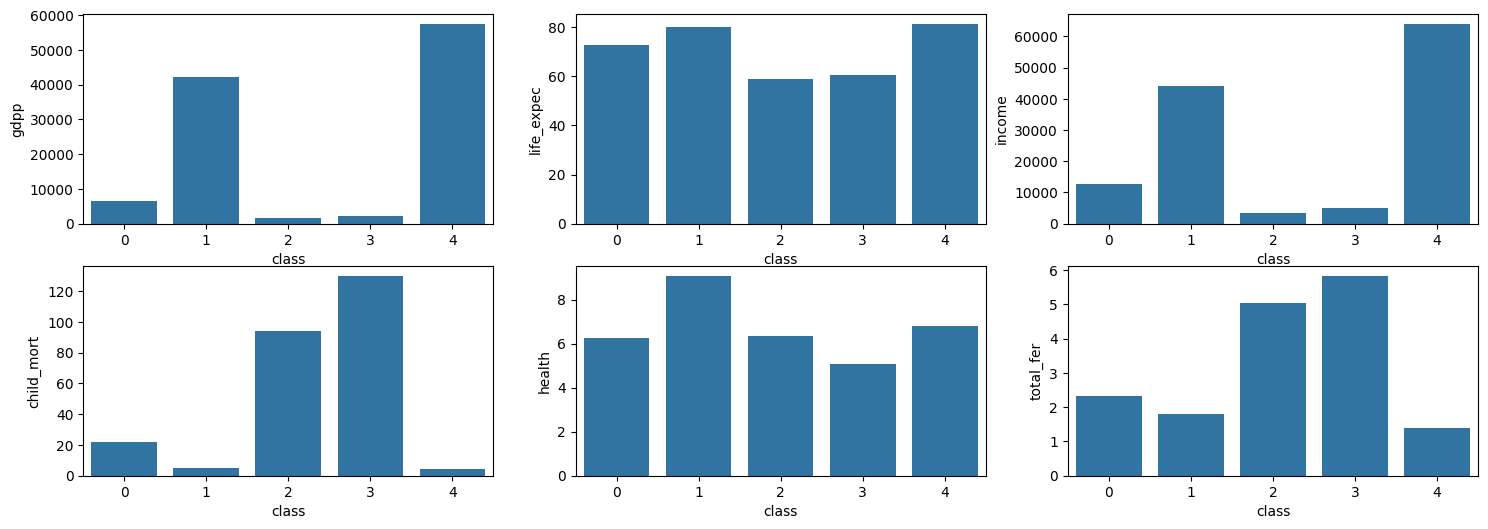

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(18, 6))
ax = ax.flatten()
for i, f in enumerate(features):
  sns.barplot(x=f_data.index, y=f_data[f], ax=ax[i])

Примерно разделим страны по классификации ООН на:
- Развивающиеся
- С переходной экономикой
- Развитые

Из графиков видно что классы разделяются на группы:

1, 4 - Развитые (Высокий ввп на душу, самая большая продолжительность жизни, высокий доход на человека)

0 - С Переходной экономикой (показатели не большие, но и не плохие)

2, 3 - Развивающиеся (аутсайдеры)

Сами классы внутри моего деления по ООН могут свидетельствовать о разной структуре экономики, например развитые (классы: 1, 4) 1 страна - это финансовый центр, 2 - технологический, какие то страны чисто экспортные и т. д.

In [ ]:
kmeans_data.groupby("class").agg({
    'child_mort': ['mean', 'min', 'max'],
    #'exports': ['mean', 'min', 'max'],
    #'health': ['mean', 'min', 'max'],
    #'imports': ['mean', 'min', 'max'],
    'income': ['mean', 'min', 'max'],
    'inflation': ['mean', 'min', 'max'],
    'life_expec': ['mean', 'min', 'max'],
    'gdpp': ['mean', 'min', 'max'],
}).T

class                       0              1             2       3  \
child_mort mean     22.219540       5.181250     94.313636   130.0   
           min       4.500000       2.600000     53.700000   130.0   
           max      64.400000      13.800000    208.000000   130.0   
income     mean  12678.965517   44021.875000   3503.250000  5150.0   
           min    1780.000000   22900.000000    609.000000  5150.0   
           max   45400.000000  125000.000000  33700.000000  5150.0   
inflation  mean      7.727747       2.513844      9.895568   104.0   
           min      -4.210000      -3.220000      0.885000   104.0   
           max      45.900000      16.700000     26.500000   104.0   
life_expec mean     72.625287      80.081250     59.022727    60.5   
           min      57.100000      73.800000     32.100000    60.5   
           max      80.400000      82.800000     71.100000    60.5   
gdpp       mean   6494.390805   42118.750000   1753.909091  2330.0   
           min     592.000000   19800.000000    231.000000  2330.0   
           max   20700.000000   87800.000000  17100.000000  2330.0   

class                        4  
child_mort mean       4.133333  
           min        2.800000  
           max        6.800000  
income     mean   64033.333333  
           min    28300.000000  
           max    91700.000000  
inflation  mean       2.468000  
           min       -0.046000  
           max        3.830000  
life_expec mean      81.433333  
           min       80.300000  
           max       82.700000  
gdpp       mean   57566.666667  
           min    21100.000000  
           max   105000.000000

Функции для визуала  

In [ ]:
# @title
import requests

def nameToCode(countries):
  r = []
  url = "https://restcountries.com/v3.1/name/"
  for c in countries:
    res = requests.get(url + c)
    if res.status_code == 200:
      code = res.json()[0]["cca2"]
      r.append(code)
    else:
      print(f"Not found {c}")
  return r

In [ ]:
# @title
from IPython.display import HTML, display

def show_geo_chart_colab(countries):
    """
    Показывает карту стран в Google Colab с полными названиями стран
    """
    # Преобразуем страны в данные для карты
    countries_js = ',\n            '.join([f"['{country}', 1]" for country in countries])

    html_code = f'''
<div id="regions_div" style="width: 900px; height: 500px;"></div>
<script src="https://www.gstatic.com/charts/loader.js"></script>
<script>
    google.charts.load('current', {{'packages':['geochart']}});
    google.charts.setOnLoadCallback(drawRegionsMap);

    function drawRegionsMap() {{
        var data = google.visualization.arrayToDataTable([
            ['Country', 'Selected'],
            {countries_js}
        ]);

        var options = {{
            colorAxis: {{colors: ['#4285F4']}},
            backgroundColor: '#ffffff',
            datalessRegionColor: '#f5f5f5',
            defaultColor: '#e0e0e0'
        }};

        var chart = new google.visualization.GeoChart(
            document.getElementById('regions_div')
        );
        chart.draw(data, options);
    }}
</script>
'''

    display(HTML(html_code))
# Пример использования с полными названиями стран

#### Эталонные страны

Эталонные страны (1, 4) имеют: Высокий ввп на душу, самая большая продолжительность жизни, высокий доход на человека, умеренную инфляцию, низкую смертность

In [ ]:
Etalon = nameToCode(kmeans_data.loc[(kmeans_data['class'] == 1) | (kmeans_data['class'] == 4)]['country'].values)
print(Etalon)

['AU', 'AT', 'BS', 'BE', 'BN', 'CA', 'CY', 'CZ', 'DK', 'FI', 'FR', 'DE', 'GR', 'IS', 'IE', 'IL', 'IT', 'JP', 'KW', 'LU', 'MT', 'BQ', 'NZ', 'NO', 'PT', 'QA', 'SG', 'SI', 'KR', 'ES', 'SE', 'CH', 'AE', 'GB', 'US']


In [ ]:
show_geo_chart_colab(Etalon)

#### Нуждающиеся в помощи

In [ ]:
NeedHelp = nameToCode(kmeans_data.loc[(kmeans_data['class'] == 2) | (kmeans_data['class'] == 3)]['country'].values)

Not found Congo, Dem. Rep.
Not found Congo, Rep.
Not found Cote d'Ivoire


In [ ]:
show_geo_chart_colab(NeedHelp)

В данном случае помогать нужно развивающимся странам классу 0 - у этих стран низкие экономические показатели, а также высокая смертность среди детей

#### Для полноты картины страны с переходной экономикой

In [ ]:
perexod = nameToCode(kmeans_data.loc[(kmeans_data['class'] == 0)]['country'].values)
print(perexod)

Not found Macedonia, FYR
Not found Micronesia, Fed. Sts.
Not found St. Vincent and the Grenadines
['AL', 'DZ', 'AG', 'AR', 'AM', 'AZ', 'BH', 'BD', 'BB', 'BY', 'BZ', 'BT', 'BO', 'BA', 'BW', 'BR', 'BG', 'KH', 'CV', 'CL', 'CN', 'CO', 'CR', 'HR', 'DO', 'EC', 'EG', 'SV', 'EE', 'FJ', 'GS', 'GD', 'GT', 'GY', 'HU', 'IN', 'ID', 'IR', 'IQ', 'JM', 'JO', 'KZ', 'KG', 'LV', 'LB', 'LY', 'LT', 'MY', 'MV', 'MU', 'MD', 'MN', 'ME', 'MA', 'MM', 'NP', 'OM', 'PA', 'PY', 'PE', 'PH', 'PL', 'RO', 'RU', 'AS', 'SA', 'RS', 'SC', 'SK', 'SB', 'LK', 'SR', 'TJ', 'TH', 'TO', 'TN', 'TR', 'TM', 'UA', 'UY', 'UZ', 'VU', 'VE', 'VN']


In [ ]:
show_geo_chart_colab(perexod)

## Иерархическая кластеризация

In [ ]:
from sklearn.cluster import AgglomerativeClustering

### Определение оптимального количества кластеров

In [ ]:
from scipy.cluster.hierarchy import dendrogram

In [ ]:
def metrics(X_scaled, max_cl=10):
  sil_scores = []
  inertias = []

  for k in range(2, max_cl + 1):
      agglom = AgglomerativeClustering(n_clusters=k)

      labels = agglom.fit_predict(X_scaled)

      sil_scores.append(silhouette_score(X_scaled, labels))

  return sil_scores

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

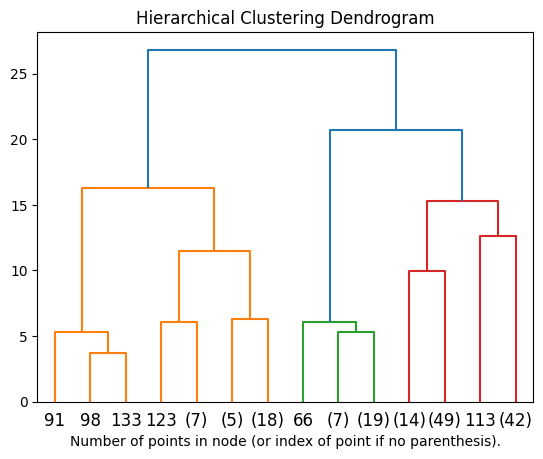

In [ ]:
agg_cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

agg_cluster = agg_cluster.fit(X_scaled)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_cluster, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

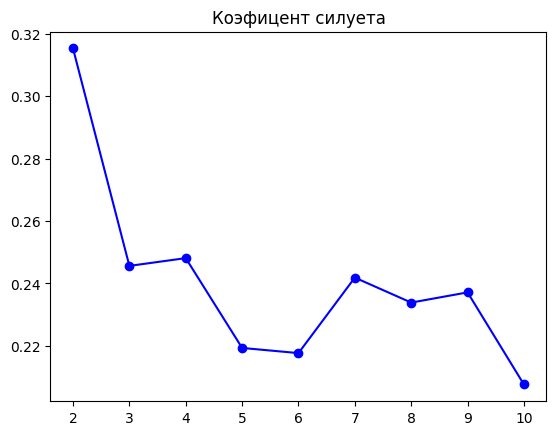

In [ ]:
sil_scores = metrics(X_scaled)

plt.plot(range(2, 10 + 1), sil_scores, 'bo-')
plt.title("Коэфицент силуета")
plt.show()

### Оптимальное количество кластеров для Иерархической кластеризации - 2

Судя по коэфиценту силуэта нужно выделить только 2 кластера, а по дендограмме, если я правильно понял как читать дендограмму, нужно 3. Разница небольшая, выберу в сторону коэфицента силуэта

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters=2)

In [ ]:
agg_labels = agg_cluster.fit_predict(X_scaled)

### Проведем визуализацию при помощи метода главных компонент

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['cluster'] = agg_labels

In [ ]:
data["class"] = agg_labels
display(data["class"].value_counts())
data.to_csv("Lab3_w_classes.csv", index=False)

,count
class,
0,133
1,34


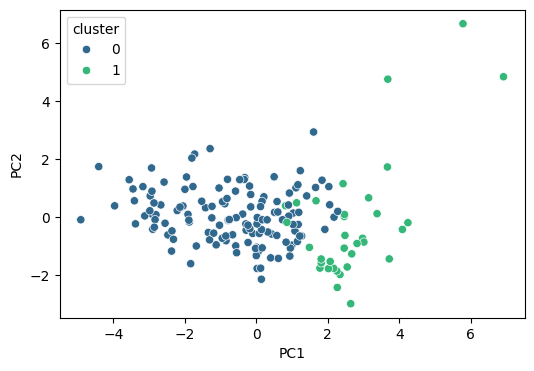

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.show()

### Описание классов

In [ ]:
agglomerate_data = data.copy()
agglomerate_data["class"] = agg_labels
agglomerate_data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0


Для описания стран возьмем 3 признака которые имеют наибольшие положительные веса в PCA
- gdpp
- life_expec
- income

In [ ]:
features = ["gdpp", "life_expec", "income", "child_mort", "health", "total_fer"]
f_data = agglomerate_data.groupby("class")[features].mean()

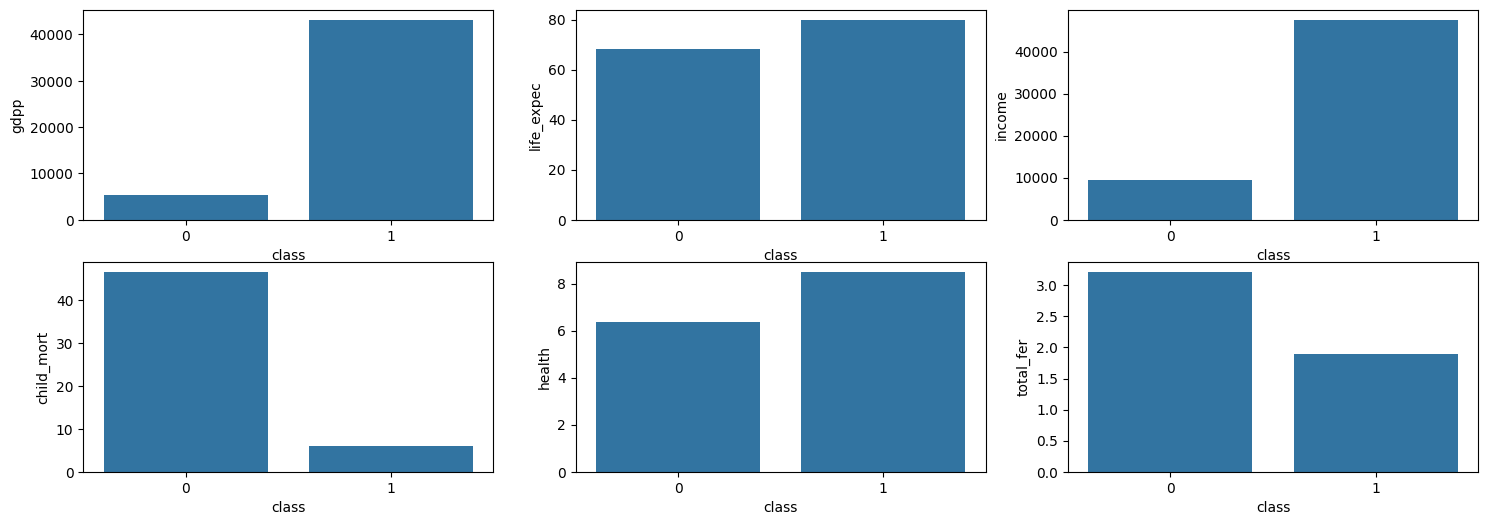

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(18, 6))
ax = ax.flatten()
for i, f in enumerate(features):
  sns.barplot(x=f_data.index, y=f_data[f], ax=ax[i])

По иерархичекой кластеризации можно просто выделить 2 обобщенные группы:

- Богатые страны
- Бедные страны

In [ ]:
agglomerate_data.groupby("class").agg({
    'child_mort': ['mean', 'min', 'max'],
    #'exports': ['mean', 'min', 'max'],
    'health': ['mean', 'min', 'max'],
    #'imports': ['mean', 'min', 'max'],
    'income': ['mean', 'min', 'max'],
    'inflation': ['mean', 'min', 'max'],
    'life_expec': ['mean', 'min', 'max'],
    'gdpp': ['mean', 'min', 'max'],
}).T

class                       0              1
child_mort mean     46.529323       5.961765
           min       3.200000       2.600000
           max     208.000000      16.600000
health     mean      6.384812       8.501176
           min       1.970000       1.810000
           max      14.200000      17.900000
income     mean   9362.127820   47588.235294
           min     609.000000   27200.000000
           max   33900.000000  125000.000000
inflation  mean      8.719090       4.115500
           min      -4.210000      -3.220000
           max     104.000000      17.200000
life_expec mean     68.145865      79.982353
           min      32.100000      75.100000
           max      80.400000      82.800000
gdpp       mean   5242.210526   43170.588235
           min     231.000000   12100.000000
           max   30800.000000  105000.000000

Из гистограммы видно, что сильные отличия в `ввп на душу` и `доходах населения`

#### Богатые страны

In [ ]:
Rich = nameToCode(agglomerate_data.loc[agglomerate_data['class'] == 1]['country'].values)
print(Rich)

['AU', 'AT', 'BH', 'BE', 'BN', 'CA', 'DK', 'FI', 'FR', 'DE', 'GR', 'IS', 'IE', 'IL', 'IT', 'JP', 'KW', 'LY', 'LU', 'MT', 'BQ', 'NZ', 'NO', 'OM', 'PT', 'QA', 'SA', 'SG', 'ES', 'SE', 'CH', 'AE', 'GB', 'US']


In [ ]:
show_geo_chart_colab(Rich)

Эталонные страны имеют: Высокий ввп на душу, высокий доход на человека, умеренную инфляцию, низкую смертность

#### Не очень богатые страны

In [ ]:
Poor = nameToCode(agglomerate_data[agglomerate_data['class'] == 0]['country'].values)
print(Poor)

Not found Congo, Dem. Rep.
Not found Congo, Rep.
Not found Cote d'Ivoire
Not found Macedonia, FYR
Not found Micronesia, Fed. Sts.
Not found St. Vincent and the Grenadines
['AF', 'AL', 'DZ', 'AO', 'AG', 'AR', 'AM', 'AZ', 'BS', 'BD', 'BB', 'BY', 'BZ', 'BJ', 'BT', 'BO', 'BA', 'BW', 'BR', 'BG', 'BF', 'BI', 'KH', 'CM', 'CV', 'CF', 'TD', 'CL', 'CN', 'CO', 'KM', 'CR', 'HR', 'CY', 'CZ', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'FJ', 'GA', 'GM', 'GS', 'GH', 'GD', 'GT', 'GW', 'GW', 'GY', 'HT', 'HU', 'IN', 'ID', 'IR', 'IQ', 'JM', 'JO', 'KZ', 'KE', 'KI', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LT', 'MG', 'MW', 'MY', 'MV', 'SO', 'MR', 'MU', 'MD', 'MN', 'ME', 'MA', 'MZ', 'MM', 'NA', 'NP', 'NG', 'NG', 'PK', 'PA', 'PY', 'PE', 'PH', 'PL', 'RO', 'RU', 'RW', 'AS', 'SN', 'RS', 'SC', 'SL', 'SK', 'SI', 'SB', 'ZA', 'KR', 'LK', 'SS', 'SR', 'TJ', 'TZ', 'TH', 'TL', 'TG', 'TO', 'TN', 'TR', 'TM', 'UG', 'UA', 'UY', 'UZ', 'VU', 'VE', 'VN', 'YE', 'ZM']


In [ ]:
show_geo_chart_colab(Poor)

В данном случае модель разделила страны на 2 группы: супер богатые, с высоким уровнем жизни, и не очень

Возможно стоило оставить 3 класса, но есть некая логика, например, восточная европа отделена. Не знаю какого года данные, но можно сказать что данная кластеризация показывает страны НАТО и все остальные.

По ней нельзя сказать кому нужно помогать

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

### Определение оптимального количества кластеров

DBSCAN сам определяет количство кластеров, будем подбирать eps по коэфиценту силуета, `minsample` оставлю по дефолту

In [ ]:
def metrics(X_scaled, eps=0.5):
  sil_scores = []
  epss = []
  for k in np.arange(eps, 1.5, 0.1):
      db_cluster = DBSCAN(eps=k)

      labels = db_cluster.fit_predict(X_scaled)
      if len(np.unique(labels)) > 2:
          sil_scores.append(silhouette_score(X_scaled, labels))
          epss.append(k)

  return sil_scores, epss

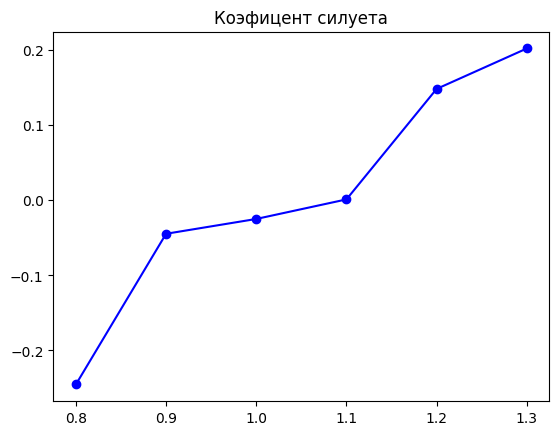

In [ ]:
sil_scores, epss = metrics(X_scaled)

plt.plot(epss, sil_scores, 'bo-')
plt.title("Коэфицент силуета")
plt.show()

Самое выское значение при eps 1.3

In [ ]:
db_cluster = DBSCAN(eps=1.3, min_samples=5)
db_labels = db_cluster.fit_predict(X_scaled)
db_data = data.copy()
db_data['class'] = db_labels
db_data.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1


In [ ]:
db_data["class"].unique()

array([ 0,  1, -1])

### Проведем визуализацию при помощи метода главных компонент

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['cluster'] = db_labels

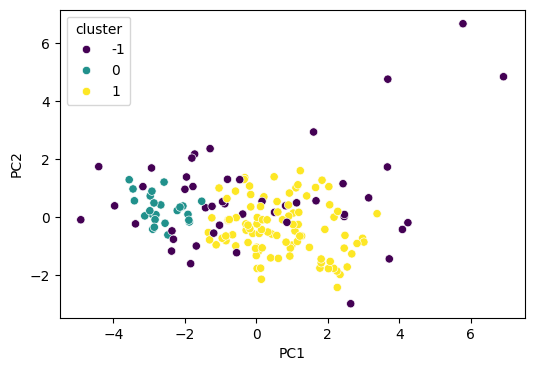

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.show()

### Описание классов

In [ ]:
features = ["gdpp", "life_expec", "income"]
db_scan_data = db_data.groupby("class")[features].mean()

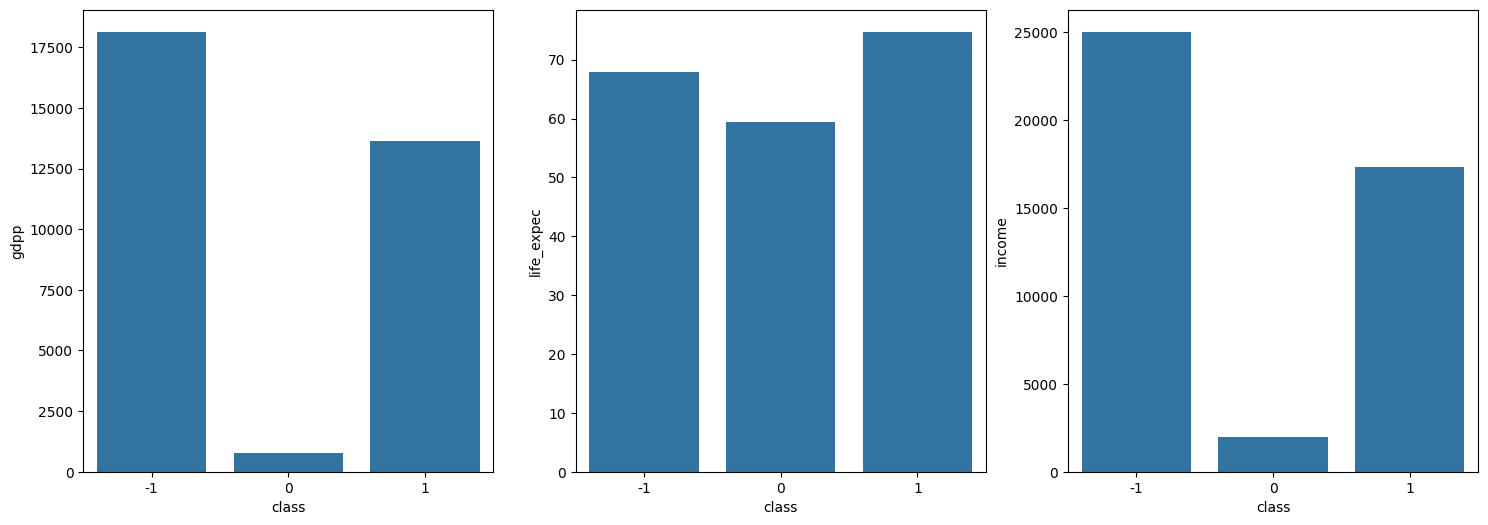

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax = ax.flatten()
for i, f in enumerate(features):
  sns.barplot(x=db_scan_data.index, y=db_scan_data[f], ax=ax[i])

In [ ]:
db_data.groupby("class").agg({
    'child_mort': ['mean', 'min', 'max'],
    #'exports': ['mean', 'min', 'max'],
    'health': ['mean', 'min', 'max'],
    #'imports': ['mean', 'min', 'max'],
    'income': ['mean', 'min', 'max'],
    'inflation': ['mean', 'min', 'max'],
    'life_expec': ['mean', 'min', 'max'],
    'gdpp': ['mean', 'min', 'max'],
}).T

class                       -1          0             1
child_mort mean      52.523913    92.6040     17.290625
           min        2.800000    55.2000      2.600000
           max      208.000000   150.0000     58.800000
health     mean       6.891739     5.7268      7.062812
           min        1.810000     2.6600      2.610000
           max       17.900000    11.6000     11.900000
income     mean   25009.065217  1963.4400  17329.791667
           min      609.000000   764.0000   1990.000000
           max   125000.000000  4480.0000  45500.000000
inflation  mean      12.880674     8.1842      5.233854
           min       -4.210000     0.8850     -1.900000
           max      104.000000    23.6000     22.800000
life_expec mean      67.852174    59.4200     74.751042
           min       32.100000    52.0000     58.600000
           max       82.700000    67.5000     82.800000
gdpp       mean   18146.021739   775.3200  13655.354167
           min      327.000000   231.0000    592.000000
           max   105000.000000  1460.0000  58000.000000

В отличии от `KMeans`, `DBSCAN` выделил страны, которым нужно помогать еще более концентрированней

#### Шумы

In [ ]:
NITUDA_NISUDA = nameToCode(db_data.loc[db_data['class'] == -1]['country'].values)
show_geo_chart_colab(NITUDA_NISUDA)

Not found Congo, Dem. Rep.
Not found Congo, Rep.
Not found Micronesia, Fed. Sts.


#### Нормисы


In [ ]:
NORMIS = nameToCode(db_data.loc[db_data['class'] == 1]['country'].values)
show_geo_chart_colab(NORMIS)

Not found Macedonia, FYR
Not found St. Vincent and the Grenadines


В данном случае явно нужно помогать 0 классу

#### Нуждаются в помощи

In [ ]:
DB_HELP = nameToCode(db_data.loc[db_data['class'] == 0]['country'].values)
print(DB_HELP)

Not found Cote d'Ivoire
['AF', 'BJ', 'BF', 'BI', 'CM', 'TD', 'KM', 'ER', 'GM', 'GH', 'GW', 'GW', 'KE', 'LA', 'MG', 'MW', 'SO', 'MZ', 'NG', 'SN', 'TZ', 'UG', 'YE', 'ZM']


In [ ]:
show_geo_chart_colab(DB_HELP)

# Результаты

В ходе лабораторной работы был проведен EDA. Освоены основные модели кластеризации `KMeans, AgglomerativeClustering, DBSCAN`

Эталонные страны везде похожи.
Они имеют: Высокий ввп на душу, высокий доход на человека, умеренную инфляцию, низкую смертность.

Страны которые нуждаются в помощи - это страны Африки и несколько стран из ближнего востока полный списко приводить не буду, визуально можно посмотреть на картах. В этих странах высокая смертность среди детей, низкие доходы, и большая рождаемость